## TD Lambda

In [1]:
# Imports
from __future__ import print_function
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib.collections import LineCollection
from matplotlib import cm
from copy import deepcopy
import plotly.graph_objects as go
from scipy.optimize import curve_fit
from dataclasses import make_dataclass
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import sys

module_path = 'src' 
if module_path not in sys.path:
    sys.path.append(module_path)
    
# Markus's code
from MM_Plot_Utils import plot, hist
from MM_Maze_Utils import *
from MM_Traj_Utils import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2

from plot_utils import plot_trajectory
from plot_utils import PlotMazeFunction_gradientcmap
import evaluation_metrics

In [2]:
from parameters import *

In [3]:
from TDLambdaXSteps_model import TDLambdaXStepsRewardReceived
from TDLambdaXStepsUCB_model import TDLambdaXStepsUCBRewardReceived

In [4]:
model_raw = TDLambdaXStepsRewardReceived()
model_UCB = TDLambdaXStepsUCBRewardReceived()

In [34]:
episodes_all_mice, episodes_all_mice_wo_rew, stats = model_UCB.simulate({0: [0.7, 100, 0.9, 0.4, 0.8, 0.3]}, 100000)

alpha, beta, gamma, lamda, mouseID, c, speed, nick 0.7 100 0.9 0.4 0 0.8 0.3 B1
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached


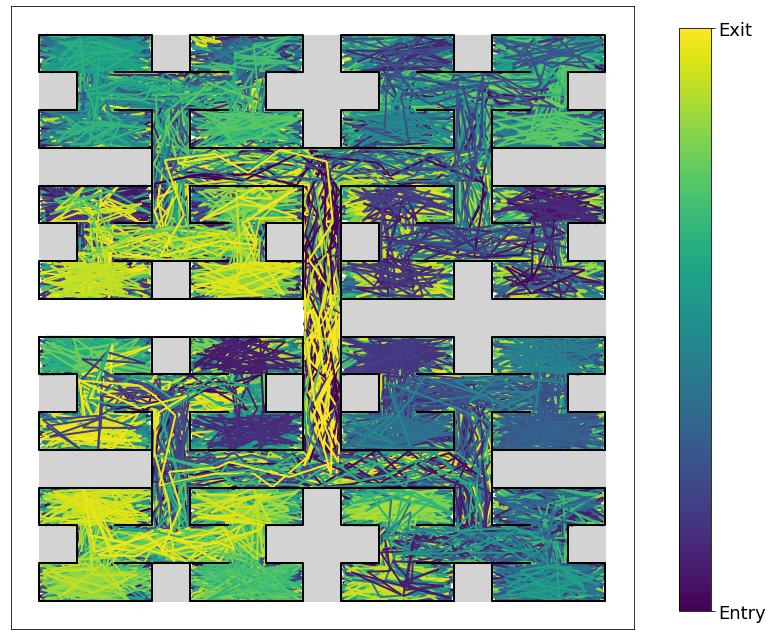

In [35]:
plot_trajectory(episodes_all_mice_wo_rew[0], 'all')

In [36]:
stats

{0: {'mouse': 'B1',
  'n_moves': array([100507.]),
  'n_bouts': 415,
  'state_values': array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.0000e-04, 2.0000e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 1.7000e-03, 1.0000e-04,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 1.7000e-03, 3.5000e-03, 0.0000e+00,
         1.0000e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         2.0000e-04, 1.3000e-03, 9.1000e-03, 2.6000e-03, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+0

In [37]:
stats[0]['state_values'][116]

0.0172

In [38]:
stats[0]['visit_frequency'][116]

747.0

In [39]:
ma = NewMaze(6)

(<AxesSubplot:>, <matplotlib.cm.ScalarMappable at 0x23448ca7670>)

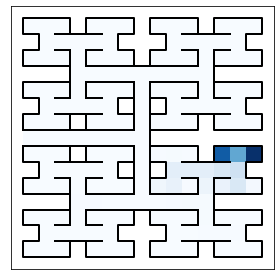

In [40]:
PlotMazeFunction_gradientcmap(stats[0]['state_values'], ma, 'state_values', 'Blues')

(<AxesSubplot:>, <matplotlib.cm.ScalarMappable at 0x23448ca7730>)

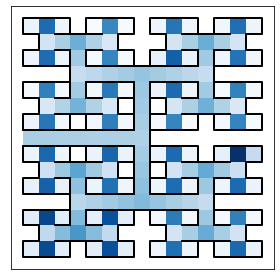

In [41]:
PlotMazeFunction_gradientcmap(stats[0]['visit_frequency'], ma, 'state_values', 'Blues')

In [42]:
all_trajs = np.array([])
for i in range(128):
    all_trajs = np.concatenate((all_trajs, np.ones(int(stats[0]['visit_frequency'][i]))*i))

(<AxesSubplot:>, <matplotlib.cm.ScalarMappable at 0x234491d7370>)

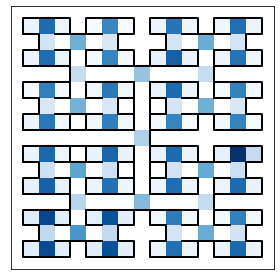

In [43]:
PlotMazeFunction_gradientcmap(all_trajs, ma, 'states', 'Blues')

In [44]:
evaluation_metrics.exploration_efficiency_sequential(episodes_all_mice[0])

{1: 1,
 2: 2,
 4: 4,
 8: 6,
 16: 10,
 32: 19,
 64: 37,
 128: 63,
 256: 64,
 512: 64,
 1024: 64,
 2048: 64,
 4096: 64,
 8192: 64,
 16384: 64}

In [45]:
ma.di

array([[ 0,  1,  2, ..., 21, 21, 21],
       [ 1,  0,  1, ..., 20, 20, 20],
       [ 2,  1,  0, ..., 19, 19, 19],
       ...,
       [21, 20, 19, ...,  0,  4,  4],
       [21, 20, 19, ...,  4,  0,  2],
       [21, 20, 19, ...,  4,  2,  0]])

In [46]:
ma.yc

array([ 7,  7,  7,  7,  7,  7,  7,  7,  6,  5,  4,  3,  8,  9, 10, 11,  3,
        3,  3,  3,  3,  3,  3,  3, 11, 11, 11, 11, 11, 11, 11, 11,  2,  1,
        4,  5,  2,  1,  4,  5, 10,  9, 12, 13, 10,  9, 12, 13,  1,  1,  1,
        1,  5,  5,  5,  5,  1,  1,  1,  1,  5,  5,  5,  5,  9,  9,  9,  9,
       13, 13, 13, 13,  9,  9,  9,  9, 13, 13, 13, 13,  0,  2,  0,  2,  4,
        6,  4,  6,  0,  2,  0,  2,  4,  6,  4,  6,  8, 10,  8, 10, 12, 14,
       12, 14,  8, 10,  8, 10, 12, 14, 12, 14,  0,  0,  2,  2,  0,  0,  2,
        2,  4,  4,  6,  6,  4,  4,  6,  6,  0,  0,  2,  2,  0,  0,  2,  2,
        4,  4,  6,  6,  4,  4,  6,  6,  8,  8, 10, 10,  8,  8, 10, 10, 12,
       12, 14, 14, 12, 12, 14, 14,  8,  8, 10, 10,  8,  8, 10, 10, 12, 12,
       14, 14, 12, 12, 14, 14])

In [47]:
model_UCB.get_SAnodemap()

array([[127,   1,   2],
       [  0,   3,   4],
       [  0,   5,   6],
       [  1,   7,   8],
       [  1,   9,  10],
       [  2,  11,  12],
       [  2,  13,  14],
       [  3,  15,  16],
       [  3,  17,  18],
       [  4,  19,  20],
       [  4,  21,  22],
       [  5,  23,  24],
       [  5,  25,  26],
       [  6,  27,  28],
       [  6,  29,  30],
       [  7,  31,  32],
       [  7,  33,  34],
       [  8,  35,  36],
       [  8,  37,  38],
       [  9,  39,  40],
       [  9,  41,  42],
       [ 10,  43,  44],
       [ 10,  45,  46],
       [ 11,  47,  48],
       [ 11,  49,  50],
       [ 12,  51,  52],
       [ 12,  53,  54],
       [ 13,  55,  56],
       [ 13,  57,  58],
       [ 14,  59,  60],
       [ 14,  61,  62],
       [ 15,  63,  64],
       [ 15,  65,  66],
       [ 16,  67,  68],
       [ 16,  69,  70],
       [ 17,  71,  72],
       [ 17,  73,  74],
       [ 18,  75,  76],
       [ 18,  77,  78],
       [ 19,  79,  80],
       [ 19,  81,  82],
       [ 20,  83

In [49]:
n_simu = 100
all_visit_frequencies = np.zeros([n_simu, 129])
for simu in range(n_simu):
    episodes_all_mice, episodes_all_mice_wo_rew, stats = model_UCB.simulate({0: [0.7, 100, 0.9, 0.4, 0.8, 0.3]}, 10000)
    all_visit_frequencies[simu,:] = stats[0]['visit_frequency'][:-1]

alpha, beta, gamma, lamda, mouseID, c, speed, nick 0.7 100 0.9 0.4 0 0.8 0.3 B1
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
alpha, beta, gamma, lamda, mouseID, c, speed, nick 0.7 100 0.9 0.4 0 0.8 0.3 B1
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
alpha, beta, gamma, lamda, mouseID, c, speed, nick 0.7 100 0.9 0.4 0 0.8 0.3 B1
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
alpha, beta, gamma, lamda, mouseID, c, speed, nick 0.7 100 0.9 0.4 0 0.8 0.3 B1
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
alpha, beta, gamma, lamda, mouseID, c, speed, nick 0.7 100 0.9 0.4 0 0.8 0.3 B1
Reward Reached


Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
alpha, beta, gamma, lamda, mouseID, c, speed, nick 0.7 100 0.9 0.4 0 0.8 0.3 B1
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
alpha, beta, gamma, lamda, mouseID, c, speed, nick 0.7 100 0.9 0.4 0 0.8 0.3 B1
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
alpha, beta, gamma, lamda, mouseID, c, speed, nick 0.7 100 0.9 0.4 0 0.8 0.3 B1
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
alpha, beta, gamma, lamda, mouseID, c, speed, nick 0.7 100 0.9 0.4 0 0.8 0.3 B1
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Rewar

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
alpha, beta, gamma, lamda, mouseID, c, speed, nick 0.7 100 0.9 0.4 0 0.8 0.3 B1
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
alpha, beta, gamma, lamda, mouseID, c, speed, nick 0.7 100 0.9 0.4 0 0.8 0.3 B1
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
alpha, beta, gamma, lamda, mouseID, c, speed, nick 0.7 100 0.9 0.4 0 0.8 0.3 B1
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
alpha, beta, gamma, lamda, mouseID, c, speed, nick 0.7 100 0.9 0.4 0 0.8 0.3 B1
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Rewar

[]

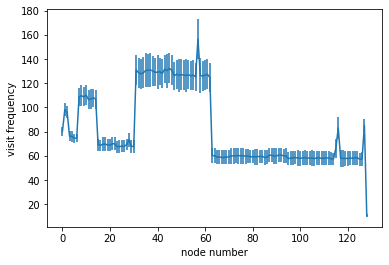

In [52]:
plt.errorbar(np.arange(129), all_visit_frequencies.mean(axis=0), all_visit_frequencies.std(axis=0))
plt.xlabel('node number')
plt.ylabel('visit frequency')
plt.plot()